In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
import tqdm
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
import os

In [7]:
train_df

,LBP_0,LBP_1,LBP_2,LBP_3,LBP_4,LBP_5,LBP_6,LBP_7,LBP_8,LBP_9,...,mc_xyz_x_mode_conc,range_xyz_y_range,iqr_xyz_y_iqr,mv_xyz_y_mode,mc_xyz_y_mode_conc,range_xyz_z_range,iqr_xyz_z_iqr,mv_xyz_z_mode,mc_xyz_z_mode_conc,Label
0,589,1153,795,2285,3329,3143,1816,1405,2067,2218,...,0.103138,116,42.0,182.5,0.102234,163,93.00,179.5,0.054787,0
1,358,991,581,2498,3626,3781,1888,1413,2614,1738,...,0.109606,111,43.0,179.5,0.113865,159,99.00,177.5,0.073789,0
2,581,1174,868,2458,4088,3442,1790,1379,2000,2110,...,0.100201,129,63.0,182.5,0.103268,165,108.00,179.5,0.061740,0
3,594,1146,704,1923,2987,2588,1617,1412,2016,2213,...,0.099244,125,45.0,184.5,0.092907,165,98.00,181.5,0.057733,0
4,480,902,690,2027,3454,3024,1500,1103,1496,1739,...,0.103564,123,47.0,178.5,0.085166,167,94.00,179.5,0.045324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,458,989,612,1711,3003,2581,1401,1122,1674,1643,...,0.129656,121,59.0,179.5,0.113927,165,111.00,177.5,0.068448,1
2404,372,881,520,1855,3893,2970,1401,1043,1662,1563,...,0.125928,138,60.0,180.5,0.118626,172,113.00,178.5,0.073700,1
2405,298,678,385,1481,2687,2403,1254,908,1555,1353,...,0.082064,80,42.0,180.5,0.082987,139,89.75,179.5,0.039686,1
2406,321,823,468,1794,3174,2976,1454,993,1628,1537,...,0.090454,100,48.0,179.5,0.097574,149,100.00,177.5,0.050897,1


                   Feature  Importance
109            compactness    0.039902
108              roundness    0.037699
171            pf_lab_a_p5    0.030098
47                   wav_h    0.029965
103         shape_factor_3    0.029031
75               Zernike_7    0.028230
71               Zernike_3    0.025096
172           pf_lab_a_p25    0.024642
97       major_axis_length    0.022152
81              Zernike_13    0.020603
38                  skew_h    0.019086
101         shape_factor_1    0.017782
82              Zernike_14    0.017148
110               solidity    0.017084
98       minor_axis_length    0.016980
80              Zernike_12    0.016766
90              Zernike_22    0.016552
96                   ratio    0.016525
106           aspect_ratio    0.015292
91              Zernike_23    0.014603
70               Zernike_2    0.014393
32                  mean_h    0.013403
88              Zernike_20    0.011828
145           pf_bgr_g_p95    0.011176
104         shape_factor_

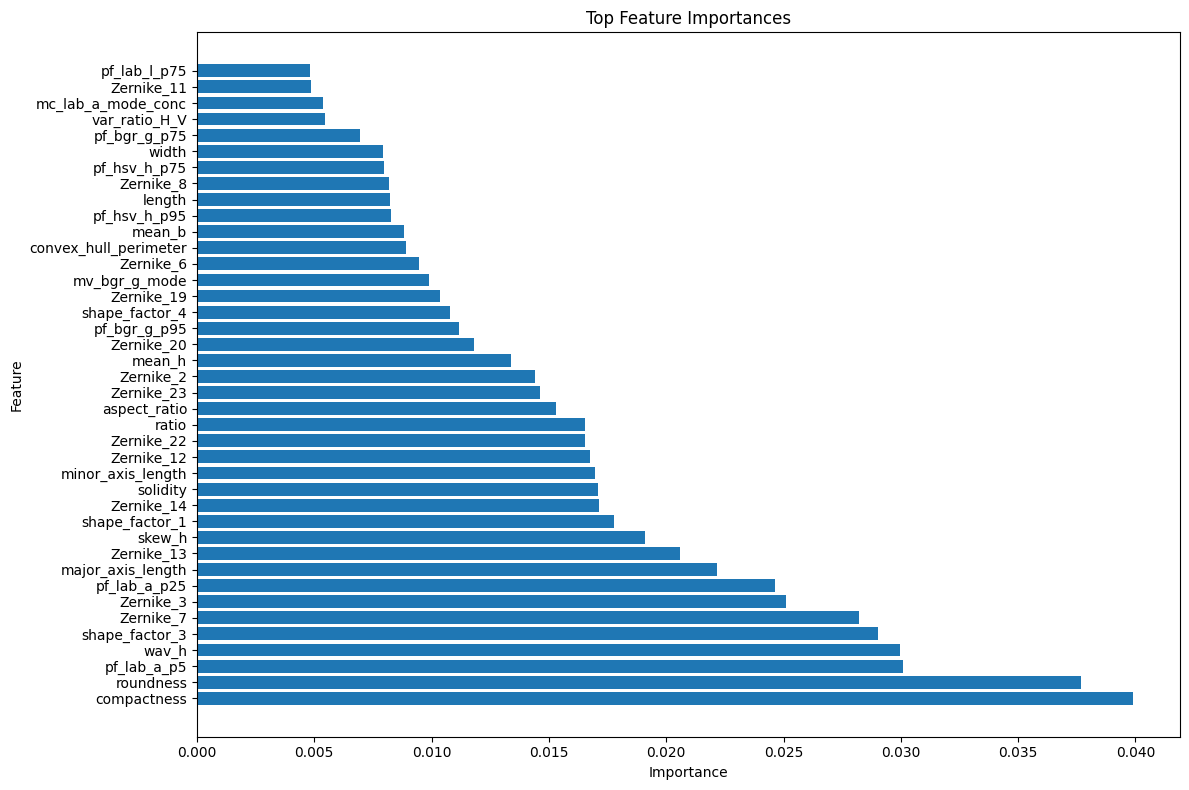

Selected 47 features: ['skew_g', 'mean_h', 'skew_h', 'wav_h', 'mean_b', 'wav_b', 'Zernike_2', 'Zernike_3', 'Zernike_6', 'Zernike_7', 'Zernike_8', 'Zernike_11', 'Zernike_12', 'Zernike_13', 'Zernike_14', 'Zernike_19', 'Zernike_20', 'Zernike_22', 'Zernike_23', 'area', 'length', 'width', 'ratio', 'major_axis_length', 'minor_axis_length', 'convex_hull_perimeter', 'shape_factor_1', 'shape_factor_3', 'shape_factor_4', 'equivalent_diameter', 'aspect_ratio', 'roundness', 'compactness', 'solidity', 'var_ratio_H_V', 'pf_bgr_g_p75', 'pf_bgr_g_p95', 'pf_hsv_h_p75', 'pf_hsv_h_p95', 'pf_lab_l_p75', 'pf_lab_l_p95', 'pf_lab_a_p5', 'pf_lab_a_p25', 'pf_lab_b_p50', 'mv_bgr_g_mode', 'mv_lab_l_mode', 'mc_lab_a_mode_conc']


In [3]:


# Load the training dataset
train_df = pd.read_csv('/home/duyle/Rice_photos/results/results_without_lab_xyz/test_old_BC-15.csv')

# Separate features and labels
X_train = train_df.drop(columns=['Label'])  # Features
y_train = train_df['Label']  # Labels

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display the top N features
top_n = 40  # Adjust as needed
print(feature_importance_df.head(top_n))

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'].head(top_n), feature_importance_df['Importance'].head(top_n))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.tight_layout()
plt.show()

# Selecting features using a threshold
selector = SelectFromModel(rf, threshold='mean')  # You can adjust the threshold
selector.fit(X_train, y_train)

# Get the selected feature indices
selected_features_idx = selector.get_support()

# Get the names of the selected features
selected_features = X_train.columns[selected_features_idx]
print(f"Selected {len(selected_features)} features: {list(selected_features)}")

# # Create new datasets with only the selected features
# X_train_selected = selector.transform(X_train)

# # Now you can save the list of selected features to use with your test data later
# np.save('selected_features.npy', selected_features)


In [12]:
test_df = pd.read_csv('/home/duyle/Rice_photos/results/results_aug/aug_bc15_test.csv')
X_test= test_df.drop(columns=['Label'])  # Features for testing
y_test = test_df['Label']  # Labels for testing

In [13]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [14]:
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_selected, y_train)
model  =SVC(kernel='rbf', gamma = "auto", C=2,random_state=42)
model.fit(X_train_selected, y_train)

SVC(C=2, gamma='auto', random_state=42)

In [15]:
y_pred = final_model.predict(X_test_selected)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       369
           1       0.92      0.99      0.95       367

    accuracy                           0.95       736
   macro avg       0.95      0.95      0.95       736
weighted avg       0.95      0.95      0.95       736



In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(accuracy, precision, recall, f1, cv_scores.mean())

0.9497282608695652 0.9521714083680842 0.9497282608695652 0.9496655455809745 0.501360074416507


/home/duyle/Rice_photos/results/test_old_BC-15.csv
/home/duyle/Rice_photos/results/test_old_Huongthom.csv
/home/duyle/Rice_photos/results/test_old_Nep87.csv
/home/duyle/Rice_photos/results/test_old_Q5.csv
/home/duyle/Rice_photos/results/test_old_Xi23.csv
/home/duyle/Rice_photos/results/test_old_Thien_uu.csv


/tmp/ipykernel_1730519/1774282882.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_importance', y='Feature', data=global_features, palette='viridis')


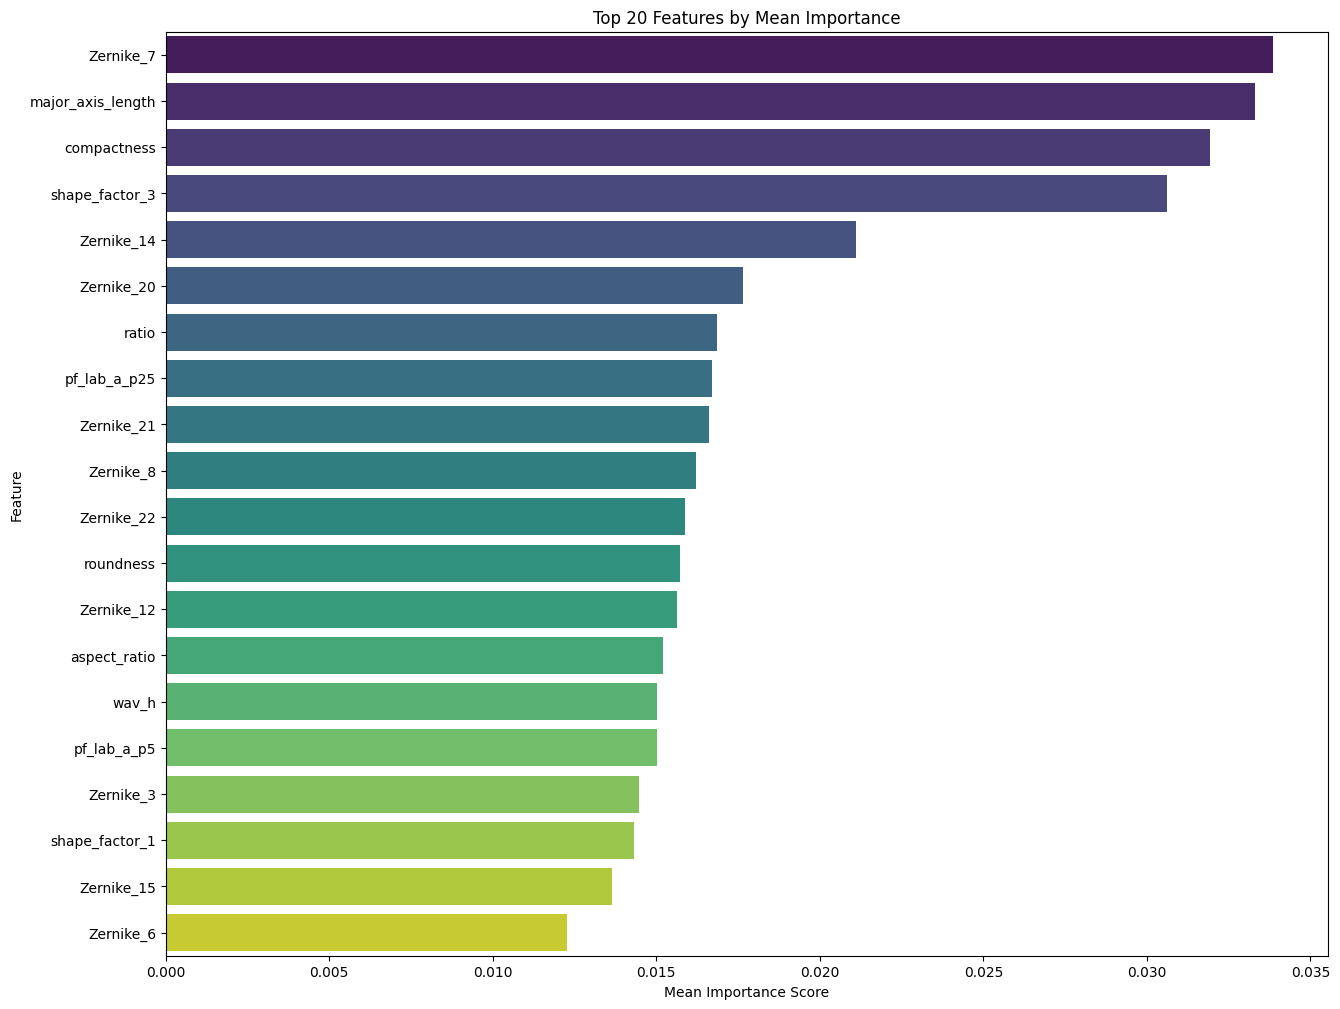

In [2]:

# Define the directory containing the CSV files
# directory = '/home/duyle/Rice_photos/features_extracted/moments'
directory = '/home/duyle/Rice_photos/results'
res = {}

# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        print(file_path)
        
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Split features and target variable
        X = df.iloc[:, :-1]  # Features
        y = df.iloc[:, -1]   # Target variable

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        # Train the Random Forest Classifier
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)

        # Store feature importances
        importances = rf.feature_importances_
        feature_names = X.columns
        
        # Store as a DataFrame
        for i, feature in enumerate(feature_names):
            res[feature] = res.get(feature, 0) + importances[i]  # Accumulate importance scores

# Convert the result to a DataFrame
importance_df = pd.DataFrame(list(res.items()), columns=['Feature', 'Total_Importance'])

# Calculate mean and standard deviation
importance_df['mean_importance'] = importance_df['Total_Importance'] / len(os.listdir(directory))
importance_df['std_importance'] = importance_df['Total_Importance'].std()  # Not necessary for mean importance

# Select the top N features based on mean importance
top_n = 20  # Adjust this as needed
global_features = importance_df.sort_values('mean_importance', ascending=False).head(top_n)

# Plotting the top features
plt.figure(figsize=(15, 12))
sns.barplot(x='mean_importance', y='Feature', data=global_features, palette='viridis')
plt.title('Top 20 Features by Mean Importance')
plt.xlabel('Mean Importance Score')
plt.ylabel('Feature')
plt.show()


In [18]:
top_n = 35 # Adjust this as needed
global_features = importance_df.sort_values('mean_importance', ascending=False).head(top_n)

In [20]:
global_features

,Feature,Total_Importance,mean_importance,std_importance
111,Zernike_7,0.236991,0.033856,0.034955
133,major_axis_length,0.233062,0.033295,0.034955
145,compactness,0.223454,0.031922,0.034955
139,shape_factor_3,0.214274,0.030611,0.034955
118,Zernike_14,0.147836,0.021119,0.034955
124,Zernike_20,0.123613,0.017659,0.034955
132,ratio,0.118076,0.016868,0.034955
208,pf_lab_a_p25,0.116964,0.016709,0.034955
125,Zernike_21,0.116223,0.016603,0.034955
112,Zernike_8,0.113560,0.016223,0.034955


In [19]:
global_features['Feature']
top100 = []
for i in global_features['Feature']:
    top100.append(i)

In [41]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=21),
    "Support Vector Machine": SVC(kernel='rbf', gamma = "auto", C=2),
    # "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=20)
    
}

In [42]:
# df=pd.read_csv(f'/home/duyle/Rice_photos/results/test_old_BC-15.csv')
# all_results = []
directory = '/home/duyle/Rice_photos/results'
# directory = '/home/duyle/Rice_photos/features_extracted/moments'
all_results = []
# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        print(file_path)
# # Ensure 'Label' column is included
# for feature_combo in tqdm.tqdm(feature_combinations,'Choosing cominations of features..'):
#     selected_features = []
    
#     # Combine selected feature groups
#     for group in feature_combo:
#         selected_features.extend(feature_groups[group])

    df = pd.read_csv(file_path)
    df_selected = df[top100 + ["Label"]]
    X = df_selected.drop(columns=['Label'])
    y = df_selected['Label']

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)



    for name, model in tqdm.tqdm(models.items(), 'Training models..'):
        # print(f"🚀 Training {name} on {feature_combo}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        print(cv_scores)
        all_results.append({
            "Model": name,
            "Dataset": file_path,
            # "Feature Combination": "+".join(feature_combo),
            "Accuracy": round(accuracy, 4),
            "Precision": round(precision,4),
            "Recall": round(recall,4),
            "F1 Score": round(f1,4),
            "CV_scores(5fold)": round(np.mean(cv_scores),4)
        })
    
results_df = pd.DataFrame(all_results)
results_df 


/home/duyle/Rice_photos/results/test_old_BC-15.csv


Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.9127789  0.93103448 0.94929006 0.93292683 0.92073171]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]


[0.9188641  0.95334686 0.95131846 0.94512195 0.92886179]
/home/duyle/Rice_photos/results/test_old_Huongthom.csv


Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.96402878 0.95683453 0.97302158 0.98381295 0.96942446]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

[0.98201439 0.97841727 0.98381295 0.98741007 0.97482014]
/home/duyle/Rice_photos/results/test_old_Nep87.csv



Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.97922078 0.98181818 0.97922078 0.98181818 0.97395833]


Training models..: 100%|██████████| 2/2 [00:00<00:00, 14.99it/s]


[0.98441558 0.98701299 0.97922078 0.98701299 0.97916667]
/home/duyle/Rice_photos/results/test_old_Q5.csv


Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.96534653 0.94292804 0.94540943 0.94540943 0.95781638]


Training models..: 100%|██████████| 2/2 [00:00<00:00, 10.71it/s]


[0.97029703 0.96774194 0.96526055 0.96277916 0.97766749]


Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.96534653 0.94292804 0.94540943 0.94540943 0.95781638]


Training models..: 100%|██████████| 2/2 [00:00<00:00, 10.56it/s]


[0.97029703 0.96774194 0.96526055 0.96277916 0.97766749]
/home/duyle/Rice_photos/results/test_old_Xi23.csv


Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.96223022 0.97122302 0.94774775 0.96936937 0.95855856]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]


[0.97841727 0.98021583 0.97657658 0.98018018 0.97297297]
/home/duyle/Rice_photos/results/test_old_Thien_uu.csv


Training models..: 100%|██████████| 2/2 [00:00<00:00, 22.38it/s]

[1.         0.98513011 0.98141264 0.98884758 0.98880597]
[0.99628253 0.98513011 0.98513011 0.98513011 0.98880597]


,Model,Dataset,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
0,K-Nearest Neighbors,/home/duyle/Rice_photos/results/test_old_BC-15...,0.9382,0.9385,0.9382,0.9382,0.9294
1,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_BC-15...,0.9456,0.9457,0.9456,0.9456,0.9395
2,K-Nearest Neighbors,/home/duyle/Rice_photos/results/test_old_Huong...,0.9796,0.9801,0.9796,0.9796,0.9694
3,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Huong...,0.9905,0.9906,0.9905,0.9905,0.9813
4,K-Nearest Neighbors,/home/duyle/Rice_photos/results/test_old_Nep87...,0.9758,0.9758,0.9758,0.9758,0.9792
5,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Nep87...,0.9810,0.9810,0.9810,0.9810,0.9834
6,K-Nearest Neighbors,/home/duyle/Rice_photos/results/test_old_Q5.csv,0.9557,0.9574,0.9557,0.9557,0.9514
7,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Q5.csv,0.9779,0.9782,0.9779,0.9779,0.9687
8,K-Nearest Neighbors,/home/duyle/Rice_photos/results/test_old_Q5.csv,0.9557,0.9574,0.9557,0.9557,0.9514
9,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Q5.csv,0.9779,0.9782,0.9779,0.9779,0.9687


In [43]:
results_df[results_df['Model'] == 'Support Vector Machine'].sort_values('CV_scores(5fold)', ascending=False)

,Model,Dataset,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
13,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Thien...,0.9849,0.9850,0.9849,0.9849,0.9881
5,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Nep87...,0.9810,0.9810,0.9810,0.9810,0.9834
3,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Huong...,0.9905,0.9906,0.9905,0.9905,0.9813
11,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Xi23.csv,0.9722,0.9726,0.9722,0.9722,0.9777
9,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Q5.csv,0.9779,0.9782,0.9779,0.9779,0.9687
7,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_Q5.csv,0.9779,0.9782,0.9779,0.9779,0.9687
1,Support Vector Machine,/home/duyle/Rice_photos/results/test_old_BC-15...,0.9456,0.9457,0.9456,0.9456,0.9395


In [12]:
print(top100)

['Zernike_7', 'major_axis_length', 'compactness', 'shape_factor_3', 'Zernike_14', 'Zernike_20', 'ratio', 'pf_lab_a_p25', 'Zernike_21', 'Zernike_8', 'Zernike_22', 'roundness', 'Zernike_12', 'aspect_ratio', 'wav_h', 'pf_lab_a_p5', 'Zernike_3', 'shape_factor_1', 'Zernike_15', 'Zernike_6', 'length', 'Zernike_23', 'Zernike_13', 'width', 'minor_axis_length', 'convex_hull_perimeter', 'pf_hsv_h_p75', 'shape_factor_2', 'pf_hsv_h_p95', 'mc_lab_a_mode_conc', 'solidity', 'mv_hsv_s_mode', 'pf_bgr_g_p95', 'mean_cr', 'shape_factor_4', 'mean_h', 'pf_xyz_y_p75', 'Zernike_19', 'pf_bgr_b_p25', 'mean_cb']
